In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [41]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv')
fr_filt = pd.read_csv(r'..\data\processed\filtered_raw_data.csv', index_col=0)
# fr_norm = pd.read_csv(r'..\data\processed\run_1_median_linregress_normalized_data.csv')
file_grouping = pd.read_csv(r'..\data\metadata\file_groupings.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

In [42]:
fr_filt

,Unique Identifier,Retention Time (min),Quant Ion,Polarity,Area (max),Identification,Lipid Class,Features Found,20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),...,20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210406_9wk_RBG.raw (F56),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210410_10wk_FBG.raw (F57),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210413_10wk_RBG.raw (F58),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210327_8wk_FBG.raw (F59),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210330_8wk_RBG.raw (F60),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210402_9wk_FBG.raw (F61),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210406_9wk_RBG.raw (F62),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210413_10wk_RBG.raw (F64)
0,unknown_679.05463_0.536,0.536,679.05463,+,2.408421e+07,unknown,unknown,49,1.145548e+07,1.728814e+07,...,1.231938e+07,1.258442e+07,6.377443e+06,1.771940e+07,1.647246e+07,1.366983e+07,1.568381e+07,1.290439e+07,1.353820e+07,1.360893e+07
1,unknown_641.1087_0.537,0.537,641.10870,+,5.522238e+07,unknown,unknown,36,4.677270e+07,5.522238e+07,...,3.428703e+07,3.415574e+07,2.455848e+07,3.852845e+07,4.172903e+07,6.220326e+06,4.279894e+07,3.789880e+07,3.219858e+07,2.889174e+07
2,unknown_951.15973_0.541,0.541,951.15973,-,3.238113e+07,unknown,unknown,10,1.625939e+07,3.238113e+07,...,1.802672e+07,1.658884e+07,1.349634e+07,1.569916e+07,1.912593e+07,1.216820e+07,2.036861e+07,1.952822e+07,1.953922e+07,1.543462e+07
3,unknown_329.03067_0.542,0.542,329.03067,-,2.882770e+08,unknown,unknown,55,1.290199e+08,6.760284e+07,...,1.575765e+08,2.173414e+08,1.282113e+08,2.882770e+08,1.142664e+08,1.452781e+08,1.763549e+08,2.236196e+08,1.790767e+08,1.651242e+08
4,unknown_969.13147_0.544,0.544,969.13147,-,1.697296e+07,unknown,unknown,14,1.089197e+07,1.697296e+07,...,7.257362e+06,9.879815e+06,6.178661e+06,6.578465e+06,8.023917e+06,4.351532e+06,1.132409e+07,1.040661e+07,8.373267e+06,9.059848e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,unknown_974.9118_20.163,20.163,974.91180,+,4.515337e+06,unknown,unknown,4,6.585959e+05,3.591638e+05,...,3.448085e+05,5.558781e+05,1.153422e+05,3.896841e+05,3.842817e+05,5.605229e+05,3.046913e+05,1.110650e+06,5.464527e+05,7.021282e+05
1482,unknown_593.58716_20.175,20.175,593.58716,+,3.296976e+06,unknown,unknown,19,1.801313e+06,1.867413e+05,...,7.956023e+05,3.804952e+05,4.007204e+05,2.390561e+05,1.291650e+06,2.886770e+05,8.545798e+05,6.331233e+05,1.647502e+06,2.088592e+05
1483,unknown_871.80945_20.196,20.196,871.80945,+,2.595829e+06,unknown,unknown,6,1.053780e+06,7.649254e+04,...,4.949319e+05,1.446089e+05,2.794735e+05,7.948007e+04,8.523295e+05,8.869149e+04,4.884374e+05,1.233201e+05,1.052764e+06,4.261791e+04
1484,unknown_1003.93829_20.435,20.435,1003.93829,+,3.203813e+06,unknown,unknown,4,5.844701e+05,2.637219e+05,...,2.294775e+05,6.374218e+05,4.261154e+04,3.421911e+05,3.890957e+05,7.912981e+05,1.910285e+05,1.147269e+06,4.434897e+05,5.509051e+05


In [43]:
file_grouping

,File Name,analytical_run_order,fr_name,rat_label,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance
0,20210729_AJ_Toh_RatBloodGlucose_Water_R1,1,20210729_AJ_Toh_RatBloodGlucose_Water_R1.raw (...,NaN,NaN,False,NaN,65,NaN,NaN
1,20210729_AJ_Toh_RatBloodGlucose_Water_R2,2,20210729_AJ_Toh_RatBloodGlucose_Water_R2.raw (...,NaN,NaN,False,NaN,66,NaN,NaN
2,20210729_AJ_Toh_RatBloodGlucose_Water_R3,3,20210729_AJ_Toh_RatBloodGlucose_Water_R3.raw (...,NaN,NaN,False,NaN,67,NaN,NaN
3,20210729_AJ_Toh_RatBloodGlucose_SolventBlank,4,20210729_AJ_Toh_RatBloodGlucose_SolventBlank.r...,NaN,NaN,False,NaN,2,NaN,NaN
4,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlank,5,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlan...,NaN,NaN,False,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
62,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021040...,63,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021040...,1062.0,RBG,True,9.0,14,2021-04-01,NaN
63,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021033...,64,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021033...,1101.0,RBG,True,8.0,54,2021-03-30,NaN
64,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021033...,65,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021033...,1092.0,RBG,True,8.0,42,2021-03-30,NaN
65,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021041...,66,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021041...,1092.0,RBG,True,10.0,46,2021-04-13,NaN


## Katie raised questions about the trendline of the boxplots in analytical order. Is there an upward trend? Also, what is going on with QC1 being so low? 

### fit a regression line to random features to observe trends 

### the general trend is an upward slope

60
slope:  [0.00713362]
y-intercept:  [20.55655739]


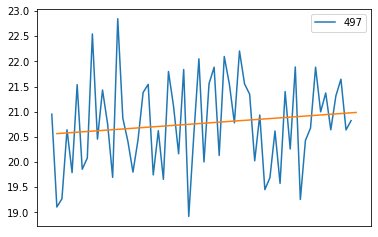

In [44]:
feat = np.log2(fr_raw.sort_values('Area (max)', ascending=False)[fr_quant_filenames_in_analytical_order]
        .filter(regex='RBG|FBG').sample().T)
feat.plot(xticks=[])

print(feat.shape[0])

# print(feat)

# get linear regression of data
fit = np.polyfit(x=range(1,feat.shape[0]+1), y=feat, deg=1)
print('slope: ', fit[0])
print('y-intercept: ', fit[1])

x=np.arange(1, feat.shape[0] + 1, dtype='float64')

plt.plot(x, (fit[0] * x + fit[1]))

plt.show()

### Histogram of slopes of regression lines for individual features is a normal distribution that trends upward. 

Therefore the data will generally trend upward in analytical order. 

array([[   630.59930867],
       [-91634.57298099],
       [ 86371.91623131],
       ...,
       [ -2206.66351669],
       [  3948.81030441],
       [  3080.72720451]])

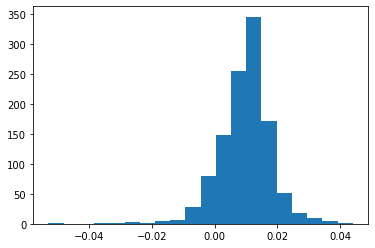

In [55]:
## Calculate all linear regression fits for all features and show histogram of slopes

fit_slopes = []

for index, row in fr_filt[fr_quant_filenames_in_analytical_order].iterrows():
    fit = LinearRegression().fit(np.arange(0,60).reshape(-1, 1),
                                              np.log2(row.T))
    fit_slopes.append(fit.coef_[0])

# print(fit_slopes)
# fit_slopes = np.array(fit_slopes).clip(-1000, 1000)
plt.hist(fit_slopes, bins=20)


from sklearn import linear_model

model = LinearRegression().fit(np.arange(0,60).reshape(-1, 1), 
                                            fr_filt[fr_quant_filenames_in_analytical_order].T)

model.coef_

# plt.plot(np.array(range(0,20)), np.arange(30, 50))

0.00035586527558313256
0.009174943179161165
21.156830311382222
[0.00917494]
0.19885098052896644


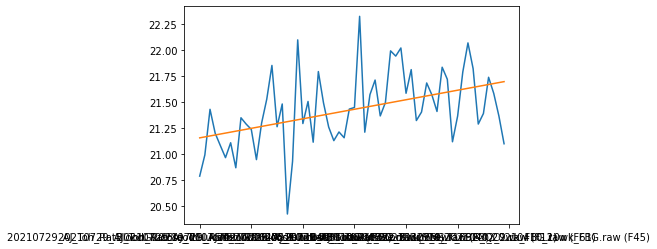

In [58]:
# plots of the medians of each file's quant
file_medians = fr_filt[fr_quant_filenames_in_analytical_order].median(axis=0)

model = LinearRegression().fit(np.arange(0, file_medians.shape[0]).reshape(-1,1),
                                            np.log2(file_medians))

# Using scipy stats module to get p_value easily 
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(0, file_medians.shape[0]),
                                                               np.log2(file_medians))
print(p_value)
print(slope)
print(intercept)

print(model.coef_)
print(model.score(np.arange(0, file_medians.shape[0]).reshape(-1,1),
                  np.log2(file_medians)))

np.log2(file_medians).plot()
plt.plot(np.arange(0,60), (np.arange(0,60)*model.coef_ + model.intercept_))

### Because the trend line slopes upward we can perform a normalization based on the slope

In [59]:
normalization_factor_arr = np.arange(0, 60)*slope + intercept 
normalization_factor_arr = (normalization_factor_arr[0] / normalization_factor_arr)
print(normalization_factor_arr)

[1.         0.99956652 0.99913342 0.9987007  0.99826835 0.99783637
 0.99740477 0.99697354 0.99654269 0.9961122  0.99568209 0.99525235
 0.99482298 0.99439398 0.99396535 0.99353709 0.9931092  0.99268167
 0.99225452 0.99182773 0.99140131 0.99097526 0.99054957 0.99012424
 0.98969929 0.98927469 0.98885047 0.9884266  0.9880031  0.98757996
 0.98715718 0.98673477 0.98631271 0.98589102 0.98546969 0.98504871
 0.9846281  0.98420785 0.98378795 0.98336841 0.98294924 0.98253041
 0.98211195 0.98169384 0.98127608 0.98085869 0.98044164 0.98002495
 0.97960862 0.97919264 0.97877701 0.97836174 0.97794681 0.97753224
 0.97711802 0.97670415 0.97629063 0.97587747 0.97546465 0.97505218]


[1.         0.99956652 0.99913342 0.9987007  0.99826835 0.99783637
 0.99740477 0.99697354 0.99654269 0.9961122  0.99568209 0.99525235
 0.99482298 0.99439398 0.99396535 0.99353709 0.9931092  0.99268167
 0.99225452 0.99182773 0.99140131 0.99097526 0.99054957 0.99012424
 0.98969929 0.98927469 0.98885047 0.9884266  0.9880031  0.98757996
 0.98715718 0.98673477 0.98631271 0.98589102 0.98546969 0.98504871
 0.9846281  0.98420785 0.98378795 0.98336841 0.98294924 0.98253041
 0.98211195 0.98169384 0.98127608 0.98085869 0.98044164 0.98002495
 0.97960862 0.97919264 0.97877701 0.97836174 0.97794681 0.97753224
 0.97711802 0.97670415 0.97629063 0.97587747 0.97546465 0.97505218]
new slope after normalization:  3.496506401874729e-05  --> is very close to 0


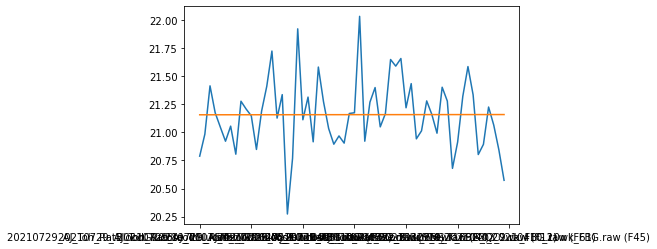

In [64]:
# Multiply each column by a factor that depends on the column index:
# Col 1 is multiplied by 1
# Col 2 multiplied by 0.99
# Col 3 by 0.98 ... 
# Using the slope and intercept from stats.linregress above:

normalization_factor_arr = np.arange(0, 60)*slope + intercept 
normalization_factor_arr = (normalization_factor_arr[0] / normalization_factor_arr)
print(normalization_factor_arr)


norm_data = np.log2(fr_filt[fr_quant_filenames_in_analytical_order]) * normalization_factor_arr

norm_data.median(axis=0).plot()

_slope, _intercept, _r_value, _p_value, _std_err = stats.linregress(np.arange(0, file_medians.shape[0]),
                                                                    norm_data.median(axis=0))

plt.plot(np.arange(0,60), (np.arange(0,60)*_slope + _intercept))

print("new slope after normalization: ", _slope, " --> is very close to 0")

In [67]:
norm_data = pd.concat([fr_filt.drop(fr_quant_filenames_in_analytical_order, axis=1), (2**norm_data)], axis=1, ).reindex(fr_filt.columns, axis=1)
norm_data

,Unique Identifier,Retention Time (min),Quant Ion,Polarity,Area (max),Identification,Lipid Class,Features Found,20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),...,20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210406_9wk_RBG.raw (F56),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210410_10wk_FBG.raw (F57),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210413_10wk_RBG.raw (F58),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210327_8wk_FBG.raw (F59),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210330_8wk_RBG.raw (F60),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210402_9wk_FBG.raw (F61),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210406_9wk_RBG.raw (F62),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210413_10wk_RBG.raw (F64)
0,unknown_679.05463_0.536,0.536,679.05463,+,2.408421e+07,unknown,unknown,49,9.961276e+06,1.691781e+07,...,1.156171e+07,9.016913e+06,5.355228e+06,1.613667e+07,1.206792e+07,1.076659e+07,1.182398e+07,9.694285e+06,9.361182e+06,1.109741e+07
1,unknown_641.1087_0.537,0.537,641.10870,+,5.522238e+07,unknown,unknown,36,4.018283e+07,5.395799e+07,...,3.205050e+07,2.397982e+07,2.031440e+07,3.493457e+07,3.004373e+07,4.955608e+06,3.171840e+07,2.794023e+07,2.183496e+07,2.334052e+07
2,unknown_951.15973_0.541,0.541,951.15973,-,3.238113e+07,unknown,unknown,10,1.409607e+07,3.166167e+07,...,1.689302e+07,1.181936e+07,1.123874e+07,1.430660e+07,1.397276e+07,9.600099e+06,1.528755e+07,1.456458e+07,1.339975e+07,1.256650e+07
3,unknown_329.03067_0.542,0.542,329.03067,-,2.882770e+08,unknown,unknown,55,1.098792e+08,6.603763e+07,...,1.464271e+08,1.469389e+08,1.041182e+08,2.584545e+08,8.073146e+07,1.105607e+08,1.275793e+08,1.598260e+08,1.168454e+08,1.305405e+08
4,unknown_969.13147_0.544,0.544,969.13147,-,1.697296e+07,unknown,unknown,14,9.475374e+06,1.660978e+07,...,6.825044e+06,7.114039e+06,5.190140e+06,6.024237e+06,5.958120e+06,3.484823e+06,8.584741e+06,7.847293e+06,5.852656e+06,7.425286e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,unknown_974.9118_20.163,20.163,974.91180,+,4.515337e+06,unknown,unknown,4,5.869303e+05,3.532438e+05,...,3.281323e+05,4.244548e+05,1.012860e+05,3.625526e+05,3.020530e+05,4.624497e+05,2.456722e+05,8.708906e+05,4.061090e+05,5.940236e+05
1482,unknown_593.58716_20.175,20.175,593.58716,+,3.296976e+06,unknown,unknown,19,1.591473e+06,1.838194e+05,...,7.546669e+05,2.927913e+05,3.470343e+05,2.230221e+05,9.924767e+05,2.404754e+05,6.770359e+05,5.013473e+05,1.194394e+06,1.793828e+05
1483,unknown_871.80945_20.196,20.196,871.80945,+,2.595829e+06,unknown,unknown,6,9.353241e+05,7.538307e+04,...,4.703338e+05,1.134936e+05,2.430057e+05,7.460833e+04,6.600295e+05,7.516016e+04,3.906703e+05,1.004837e+05,7.709440e+05,3.733296e+04
1484,unknown_1003.93829_20.435,20.435,1003.93829,+,3.203813e+06,unknown,unknown,4,5.214056e+05,2.594792e+05,...,2.187251e+05,4.853630e+05,3.783643e+04,3.185984e+05,3.057656e+05,6.495841e+05,1.552571e+05,8.990945e+05,3.311393e+05,4.674901e+05


In [68]:
norm_data.to_csv(r'..\data\processed\run_1_median_linregress_normalized_data.csv')

In [146]:
norm_data = pd.read_csv(r'..\data\processed\run_1_median_linregress_normalized_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_groupings.csv', 
                            index_col=0,
                            dtype={'week': 'Int64', 'rat_label': 'Int64'})
norm_data

,Unique Identifier,Retention Time (min),Quant Ion,Polarity,Area (max),Identification,Lipid Class,Features Found,20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),...,20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210406_9wk_RBG.raw (F56),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210410_10wk_FBG.raw (F57),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210413_10wk_RBG.raw (F58),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210327_8wk_FBG.raw (F59),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210330_8wk_RBG.raw (F60),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210402_9wk_FBG.raw (F61),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210406_9wk_RBG.raw (F62),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210413_10wk_RBG.raw (F64)
0,unknown_679.05463_0.536,0.536,679.05463,+,2.408421e+07,unknown,unknown,49,9.961276e+06,1.691781e+07,...,1.156171e+07,9.016913e+06,5.355228e+06,1.613667e+07,1.206792e+07,1.076659e+07,1.182398e+07,9.694285e+06,9.361182e+06,1.109741e+07
1,unknown_641.1087_0.537,0.537,641.10870,+,5.522238e+07,unknown,unknown,36,4.018283e+07,5.395799e+07,...,3.205050e+07,2.397982e+07,2.031440e+07,3.493457e+07,3.004373e+07,4.955608e+06,3.171840e+07,2.794023e+07,2.183496e+07,2.334052e+07
2,unknown_951.15973_0.541,0.541,951.15973,-,3.238113e+07,unknown,unknown,10,1.409607e+07,3.166167e+07,...,1.689302e+07,1.181936e+07,1.123874e+07,1.430660e+07,1.397276e+07,9.600099e+06,1.528755e+07,1.456458e+07,1.339975e+07,1.256650e+07
3,unknown_329.03067_0.542,0.542,329.03067,-,2.882770e+08,unknown,unknown,55,1.098792e+08,6.603763e+07,...,1.464271e+08,1.469389e+08,1.041182e+08,2.584545e+08,8.073146e+07,1.105607e+08,1.275793e+08,1.598260e+08,1.168454e+08,1.305405e+08
4,unknown_969.13147_0.544,0.544,969.13147,-,1.697296e+07,unknown,unknown,14,9.475374e+06,1.660978e+07,...,6.825044e+06,7.114039e+06,5.190140e+06,6.024237e+06,5.958120e+06,3.484823e+06,8.584741e+06,7.847293e+06,5.852656e+06,7.425286e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,unknown_974.9118_20.163,20.163,974.91180,+,4.515337e+06,unknown,unknown,4,5.869303e+05,3.532438e+05,...,3.281323e+05,4.244548e+05,1.012860e+05,3.625526e+05,3.020530e+05,4.624497e+05,2.456722e+05,8.708906e+05,4.061090e+05,5.940236e+05
1482,unknown_593.58716_20.175,20.175,593.58716,+,3.296976e+06,unknown,unknown,19,1.591473e+06,1.838194e+05,...,7.546669e+05,2.927913e+05,3.470343e+05,2.230221e+05,9.924767e+05,2.404754e+05,6.770359e+05,5.013473e+05,1.194394e+06,1.793828e+05
1483,unknown_871.80945_20.196,20.196,871.80945,+,2.595829e+06,unknown,unknown,6,9.353241e+05,7.538307e+04,...,4.703338e+05,1.134936e+05,2.430057e+05,7.460833e+04,6.600295e+05,7.516016e+04,3.906703e+05,1.004837e+05,7.709440e+05,3.733296e+04
1484,unknown_1003.93829_20.435,20.435,1003.93829,+,3.203813e+06,unknown,unknown,4,5.214056e+05,2.594792e+05,...,2.187251e+05,4.853630e+05,3.783643e+04,3.185984e+05,3.057656e+05,6.495841e+05,1.552571e+05,8.990945e+05,3.311393e+05,4.674901e+05


In [147]:
file_grouping

,File Name,analytical_run_order,fr_name,rat_label,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance
0,20210729_AJ_Toh_RatBloodGlucose_Water_R1,1,20210729_AJ_Toh_RatBloodGlucose_Water_R1.raw (...,<NA>,NaN,False,<NA>,65,NaN,NaN
1,20210729_AJ_Toh_RatBloodGlucose_Water_R2,2,20210729_AJ_Toh_RatBloodGlucose_Water_R2.raw (...,<NA>,NaN,False,<NA>,66,NaN,NaN
2,20210729_AJ_Toh_RatBloodGlucose_Water_R3,3,20210729_AJ_Toh_RatBloodGlucose_Water_R3.raw (...,<NA>,NaN,False,<NA>,67,NaN,NaN
3,20210729_AJ_Toh_RatBloodGlucose_SolventBlank,4,20210729_AJ_Toh_RatBloodGlucose_SolventBlank.r...,<NA>,NaN,False,<NA>,2,NaN,NaN
4,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlank,5,20210729_AJ_Toh_RatBloodGlucose_ExtractionBlan...,<NA>,NaN,False,<NA>,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
62,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021040...,63,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021040...,1062,RBG,True,9,14,2021-04-01,NaN
63,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021033...,64,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021033...,1101,RBG,True,8,54,2021-03-30,NaN
64,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021033...,65,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021033...,1092,RBG,True,8,42,2021-03-30,NaN
65,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021041...,66,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021041...,1092,RBG,True,10,46,2021-04-13,NaN


### Create PCAs of normalized data

In [148]:
pca_data = norm_data[fr_quant_filenames_in_analytical_order].T

# pd.merge (and df.merge()) is how you do database join 
pca_data = pd.merge(pca_data, file_grouping[['fr_name', 'rat_label', 'bg_type']],
                    how='inner', left_on=pca_data.index, right_on='fr_name',)\
                    .set_index(pca_data.index).drop('fr_name', axis=1)
pca_data

,0,1,2,3,4,5,6,7,8,9,...,1473,1479,1480,1481,1482,1483,1484,1486,rat_label,bg_type
20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),1.388749e+06,3.035806e+06,1.663567e+06,2.215194e+07,6.816564e+05,8.682616e+06,3.747518e+08,1.902448e+05,6.530761e+05,2.106110e+07,...,3.574035e+05,8.765036e+04,4.881645e+05,1.149073e+05,2.165170e+05,3.460561e+05,1.032091e+05,1.395636e+04,1076,FBG
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),1.042115e+07,2.518605e+07,1.392469e+07,1.177824e+08,6.859021e+06,8.005044e+07,1.326488e+09,2.917500e+05,4.217597e+06,7.913322e+07,...,7.455113e+05,1.941844e+05,6.674987e+05,1.687196e+05,6.192762e+05,3.932969e+05,8.144660e+04,8.358880e+04,1062,FBG
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),9.760335e+06,2.175648e+07,8.615691e+06,1.096654e+08,3.459855e+06,7.118307e+07,8.111771e+08,8.962073e+05,4.653153e+06,5.186759e+07,...,2.781841e+06,2.266050e+06,3.026776e+06,1.123399e+06,2.826003e+06,2.051036e+06,6.631899e+05,4.695486e+05,1093,FBG
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),1.691781e+07,5.395799e+07,3.166167e+07,6.603763e+07,1.660978e+07,1.644834e+08,4.114053e+09,4.161237e+05,4.975742e+06,1.347057e+08,...,1.577400e+06,3.531664e+05,2.481525e+05,3.532438e+05,1.838194e+05,7.538307e+04,2.594792e+05,1.904778e+05,1060,RBG
20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),2.068295e+07,4.495125e+07,1.727584e+07,1.667585e+08,5.238700e+06,1.263464e+08,1.471754e+09,1.156155e+06,5.831464e+06,8.632717e+07,...,9.780301e+05,3.153424e+05,1.149945e+06,2.596903e+05,1.045870e+06,8.989649e+05,1.679354e+05,1.515954e+05,1091,FBG
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),1.566393e+07,3.210691e+07,1.877686e+07,1.694723e+08,9.532403e+06,1.076569e+08,1.731782e+09,2.874464e+05,5.910521e+06,8.406144e+07,...,1.025856e+06,3.506216e+05,2.320367e+05,2.808097e+05,1.709037e+05,4.817732e+04,1.962425e+05,1.505868e+05,1092,RBG
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),1.546696e+07,2.879476e+07,1.295828e+07,1.789388e+08,7.275446e+06,7.900832e+07,9.702365e+08,6.507078e+05,5.296912e+06,5.831564e+07,...,1.115585e+06,3.278851e+05,4.680471e+05,2.898609e+05,3.187819e+05,9.957186e+04,2.424102e+05,1.834479e+05,1093,RBG
20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),1.097162e+07,2.717046e+07,1.779705e+07,1.573730e+08,7.708929e+06,8.299244e+07,1.155493e+09,2.609918e+05,6.411470e+06,6.807377e+07,...,4.700943e+05,4.216820e+04,6.255376e+05,2.311439e+04,7.451995e+05,6.815743e+05,1.473037e+04,2.196649e+04,1082,FBG
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),2.246001e+07,3.483616e+07,9.429265e+06,2.031222e+08,5.522723e+06,7.306498e+07,8.820650e+08,3.041119e+05,7.248599e+06,4.943534e+07,...,1.568714e+06,5.056816e+05,3.141871e+05,4.738119e+05,2.155482e+05,9.229856e+04,3.621453e+05,2.126421e+05,1060,RBG
20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),1.156171e+07,3.205050e+07,1.689302e+07,1.464271e+08,6.825044e+06,1.074644e+08,1.333837e+09,4.893998e+06,6.037140e+06,7.845387e+07,...,1.176574e+06,6.391238e+05,8.425491e+05,3.281323e+05,7.546669e+05,4.703338e+05,2.187251e+05,1.534330e+04,1101,FBG


In [149]:
n_components = 2
pca = PCA(n_components=n_components)

scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label'], axis=1))
fitted = pca.fit_transform(scaled)
columns = ['pc' + str(x) for x in range(1, n_components+1)]
fitted = pd.DataFrame(fitted, columns=columns)

pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label']]], axis=1)
pca_data

,pc1,pc2,bg_type,rat_label
0,-22.245035,10.828642,FBG,1076
1,-23.202568,14.708948,FBG,1062
2,-14.128190,12.787347,FBG,1093
3,4.349870,-12.135575,RBG,1060
4,-18.441753,3.227266,FBG,1091
5,9.081670,-23.430535,RBG,1092
6,3.656178,-17.251562,RBG,1093
7,-17.862053,-3.614451,FBG,1082
8,18.788769,-16.964551,RBG,1060
9,-10.408957,3.161798,FBG,1101


In [150]:
pca_data['rat_label'].values[0]

1076

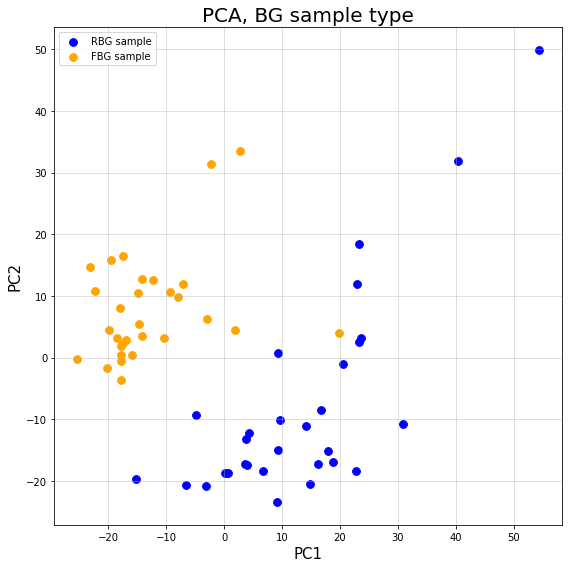

In [151]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, BG sample type', fontsize = 20)
targets = ['RBG', 'FBG']
target_colors = ['blue', 'orange']
markers = ['o', 's']
rat_labels = ['1101', '1092', '1062', '1082', '1102', '1091', '1076', '1060', '1074', '1093']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, color in zip(targets, target_colors):
#     for label, color in zip(rat_labels, colors):
        scatter_points = pca_data[(pca_data['bg_type'] == target)] 
#         print(scatter_points)
        ax.scatter(scatter_points['pc1'],
                   scatter_points['pc2'],
                   c = color,
                   cmap='viridis',
#                    marker=marker,
                   s = 60)
ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()


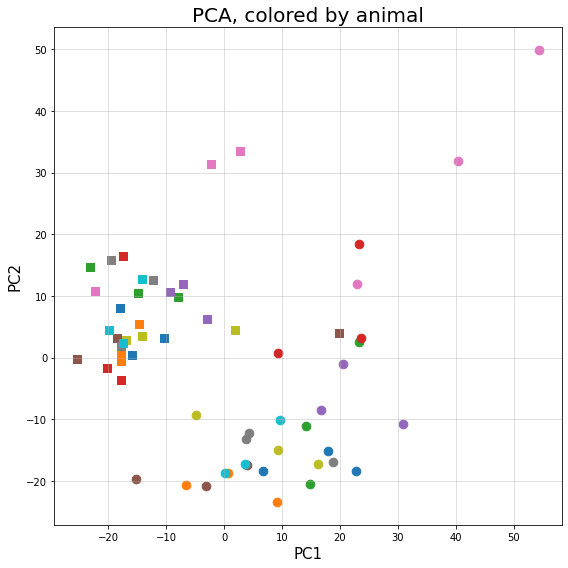

In [152]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, colored by animal', fontsize = 20)
targets = ['RBG', 'FBG']
markers = ['o', 's']
rat_labels = ['1101', '1092', '1062', '1082', '1102', '1091', '1076', '1060', '1074', '1093']
rat_labels = [int(x) for x in rat_labels]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, marker in zip(targets,markers):
    for label, color in zip(rat_labels, colors):
        scatter_points = pca_data[(pca_data['bg_type'] == target) & (pca_data['rat_label'] == label)]
#         print(scatter_points)
        ax.scatter(scatter_points['pc1'],
                   scatter_points['pc2'],
                   c = color,
#                    cmap='viridis',
                   marker=marker,
                   s = 75,
                   )
        
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

### The Boxiest of Boxplots using regression normalized data



60


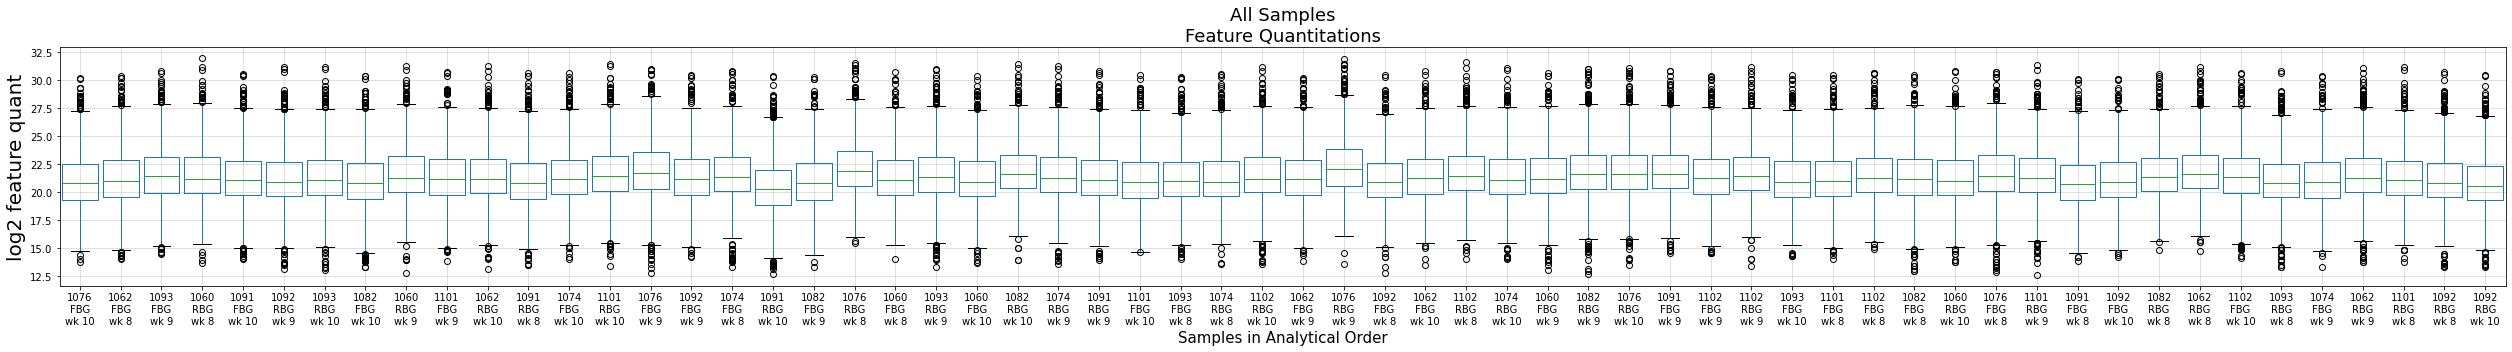

In [153]:
fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

np.log2(norm_data[fr_quant_filenames_in_analytical_order]).boxplot(widths=0.88)


fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((35, 5))
ax.grid(True, alpha=0.5)

# Get the LipiDex file number (F43) for each file
# labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fr_quant_filenames_in_analytical_order]

labels = []

for filename in fr_quant_filenames_in_analytical_order:
    rat_label = str(int(file_grouping[file_grouping['fr_name'] == filename]['rat_label'].values[0]))
    bg_type = file_grouping[file_grouping['fr_name'] == filename]['bg_type'].values[0]
    week = str(int(file_grouping[file_grouping['fr_name'] == filename]['week'].values[0]))
    labels.append(f'{rat_label}\n{bg_type}\nwk {week}')

print(len(set(labels)))
    
plt.xticks(range(1, 61), labels=labels)
# plt.xticks(range(1, 61), labels=samples.columns.to_list(), fontsize=15, rotation=90)
plt.xlabel('Samples in Analytical Order', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
plt.title('All Samples\nFeature Quantitations', fontsize=18)
plt.tight_layout()

In [159]:
# qc1_median = np.log2(norm_data.filter(regex='QC1')).median()
all_median = np.log2(norm_data.filter(regex='.raw').mean(axis=1)).median()
qc2_qc3_median = np.log2(norm_data.filter(regex='QC2|QC3').mean(axis=1)).median()
norm_data.filter(regex='QC2|QC3')

,20210729_AJ_Toh_RatBloodGlucose_T1062M_20210329_9wk_FBG_QC2.raw (F12)
0,8.620075e+06
1,2.228472e+07
2,1.045787e+07
3,1.103581e+08
4,6.701929e+06
...,...
1481,2.644414e+05
1482,6.998475e+05
1483,4.164114e+05
1484,7.508810e+04


30


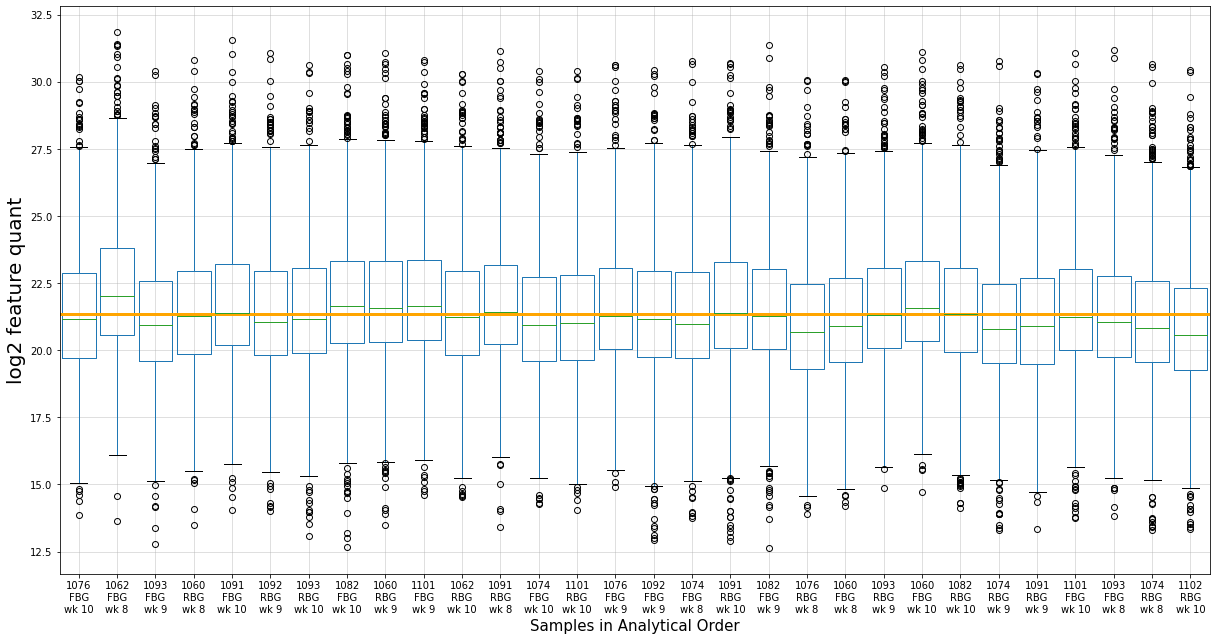

In [160]:
np.log2(norm_data[fr_quant_filenames_in_analytical_order].iloc[:,30:]).boxplot(widths=0.88)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((17, 9))
ax.grid(True, alpha=0.5)

# Get the LipiDex file number (F43) for each file
# labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fr_quant_filenames_in_analytical_order]

labels = []

for filename in fr_quant_filenames_in_analytical_order[0:30]:
    rat_label = str(int(file_grouping[file_grouping['fr_name'] == filename]['rat_label'].values[0]))
    bg_type = file_grouping[file_grouping['fr_name'] == filename]['bg_type'].values[0]
    week = str(int(file_grouping[file_grouping['fr_name'] == filename]['week'].values[0]))
    labels.append(f'{rat_label}\n{bg_type}\nwk {week}')

print(len(set(labels)))

# plt.plot([0.5, 30.5], [qc1_median, qc1_median], c='r')
plt.plot([0.5, 30.5], [all_median, all_median], c='orange', linewidth=3)
# plt.plot([0.5, 30.5], [qc2_qc3_median, qc2_qc3_median], c='purple', linewidth=3)
    
plt.xticks(range(1, 31), labels=labels)
# plt.xticks(range(1, 61), labels=samples.columns.to_list(), fontsize=15, rotation=90)
plt.xlabel('Samples in Analytical Order', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
# plt.title('All Samples\nFeature Quantitations', fontsize=18)
plt.tight_layout()

30


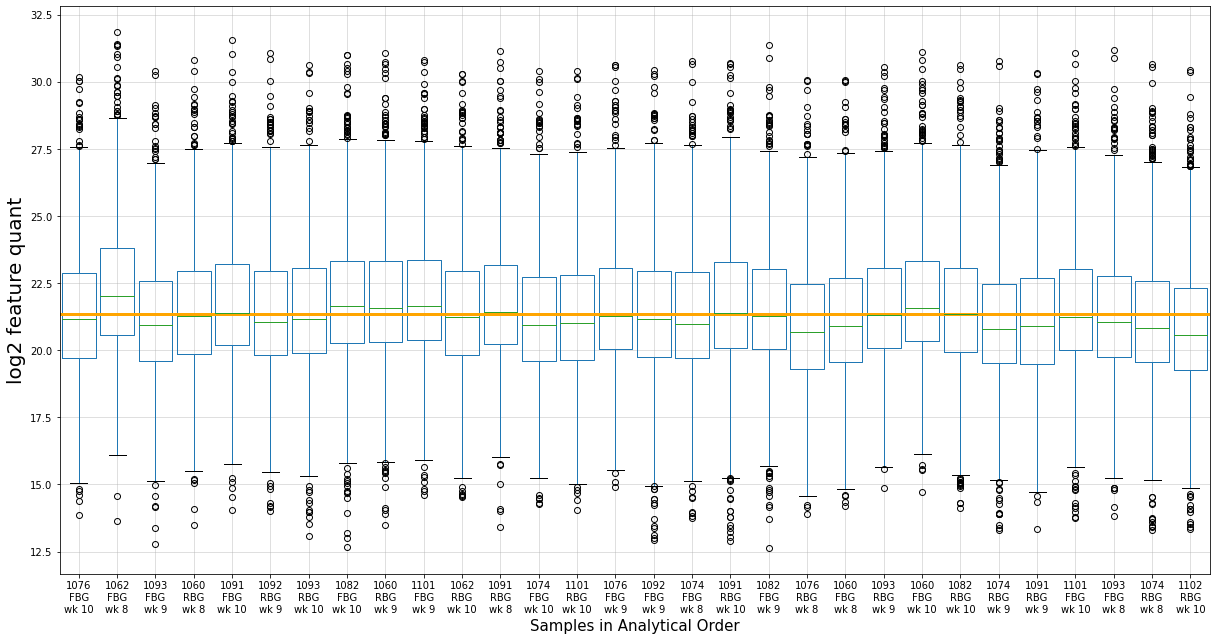

In [161]:
np.log2(norm_data[fr_quant_filenames_in_analytical_order].iloc[:,30:]).boxplot(widths=0.88)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((17, 9))
ax.grid(True, alpha=0.5)

# Get the LipiDex file number (F43) for each file
# labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fr_quant_filenames_in_analytical_order]

labels = []

for filename in fr_quant_filenames_in_analytical_order[0:30]:
    rat_label = str(int(file_grouping[file_grouping['fr_name'] == filename]['rat_label'].values[0]))
    bg_type = file_grouping[file_grouping['fr_name'] == filename]['bg_type'].values[0]
    week = str(int(file_grouping[file_grouping['fr_name'] == filename]['week'].values[0]))
    labels.append(f'{rat_label}\n{bg_type}\nwk {week}')

print(len(set(labels)))

# plt.plot([0.5, 30.5], [qc1_median, qc1_median], c='r')
plt.plot([0.5, 30.5], [all_median, all_median], c='orange', linewidth=3)
# plt.plot([0.5, 30.5], [qc2_qc3_median, qc2_qc3_median], c='purple', linewidth=3)
    
plt.xticks(range(1, 31), labels=labels)
# plt.xticks(range(1, 61), labels=samples.columns.to_list(), fontsize=15, rotation=90)
plt.xlabel('Samples in Analytical Order', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
# plt.title('All Samples\nFeature Quantitations', fontsize=18)
plt.tight_layout()

plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\all samples feature quant analytical order 2.png')           
